<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [2]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 167.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 195.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 170.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 133.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 97.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 153.6 MB/s eta 0:00:00


#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [3]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [4]:
## Write your code here

critical_columns = ['Employment', 'JobSat', 'RemoteWork']

df['Employment'] = df['Employment'].fillna('Unknown')

df['JobSat'] = df['JobSat'].fillna(df['JobSat'].mode()[0])

df['RemoteWork'] = df['RemoteWork'].fillna(df['RemoteWork'].mode()[0])

missing_values_after = df[critical_columns].isnull().sum()
print("Missing values after handling:\n", missing_values_after)

Missing values after handling:
 Employment    0
JobSat        0
RemoteWork    0
dtype: int64


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


/tmp/ipykernel_299/1893258800.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_satisfaction = df.groupby('ExperienceRange')['JobSat'].median()
/tmp/ipykernel_299/1893258800.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=median_satisfaction.index, y=median_satisfaction.values, palette='viridis')


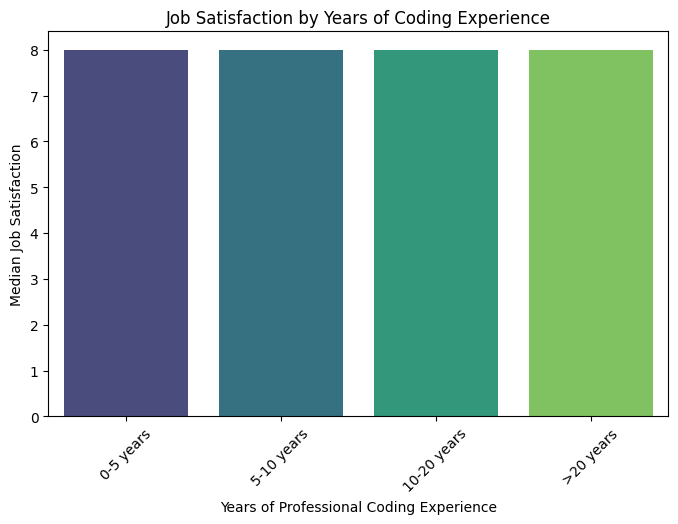

In [5]:
## Write your code here
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

bins = [0, 5, 10, 20, float('inf')]
labels = ['0-5 years', '5-10 years', '10-20 years', '>20 years']

df['ExperienceRange'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=False)

median_satisfaction = df.groupby('ExperienceRange')['JobSat'].median()

plt.figure(figsize=(8, 5))
sns.barplot(x=median_satisfaction.index, y=median_satisfaction.values, palette='viridis')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Median Job Satisfaction')
plt.title('Job Satisfaction by Years of Coding Experience')
plt.xticks(rotation=45)
plt.show()

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


/tmp/ipykernel_299/549552633.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['JobSat'], palette='viridis')


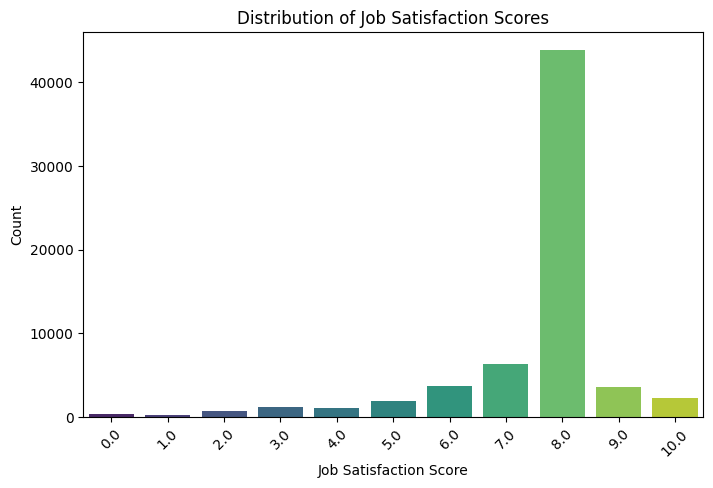

In [6]:
## Write your code here
plt.figure(figsize=(8, 5))
sns.countplot(x=df['JobSat'], palette='viridis')

plt.xlabel('Job Satisfaction Score')
plt.ylabel('Count')
plt.title('Distribution of Job Satisfaction Scores')

plt.xticks(rotation=45)
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


/tmp/ipykernel_299/3770881420.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['RemoteWork'], palette='viridis')


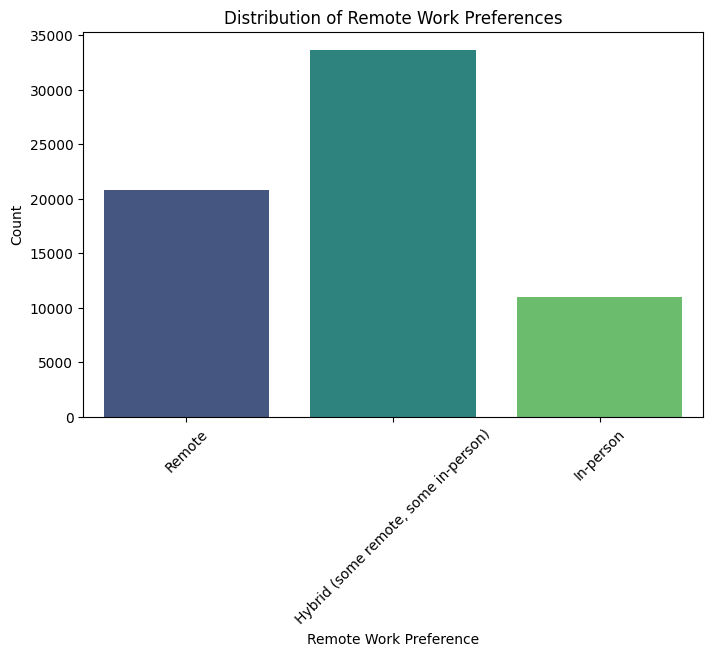

Remote Work Preferences by Employment Type:
 Employment                            Employed, full-time  \
RemoteWork                                                  
Hybrid (some remote, some in-person)            44.302144   
In-person                                       21.905177   
Remote                                          33.792679   

Employment                            Employed, full-time;Employed, part-time  \
RemoteWork                                                                      
Hybrid (some remote, some in-person)                                40.094340   
In-person                                                           15.094340   
Remote                                                              44.811321   

Employment                            Employed, full-time;Independent contractor, freelancer, or self-employed  \
RemoteWork                                                                                                       
Hybrid (some re

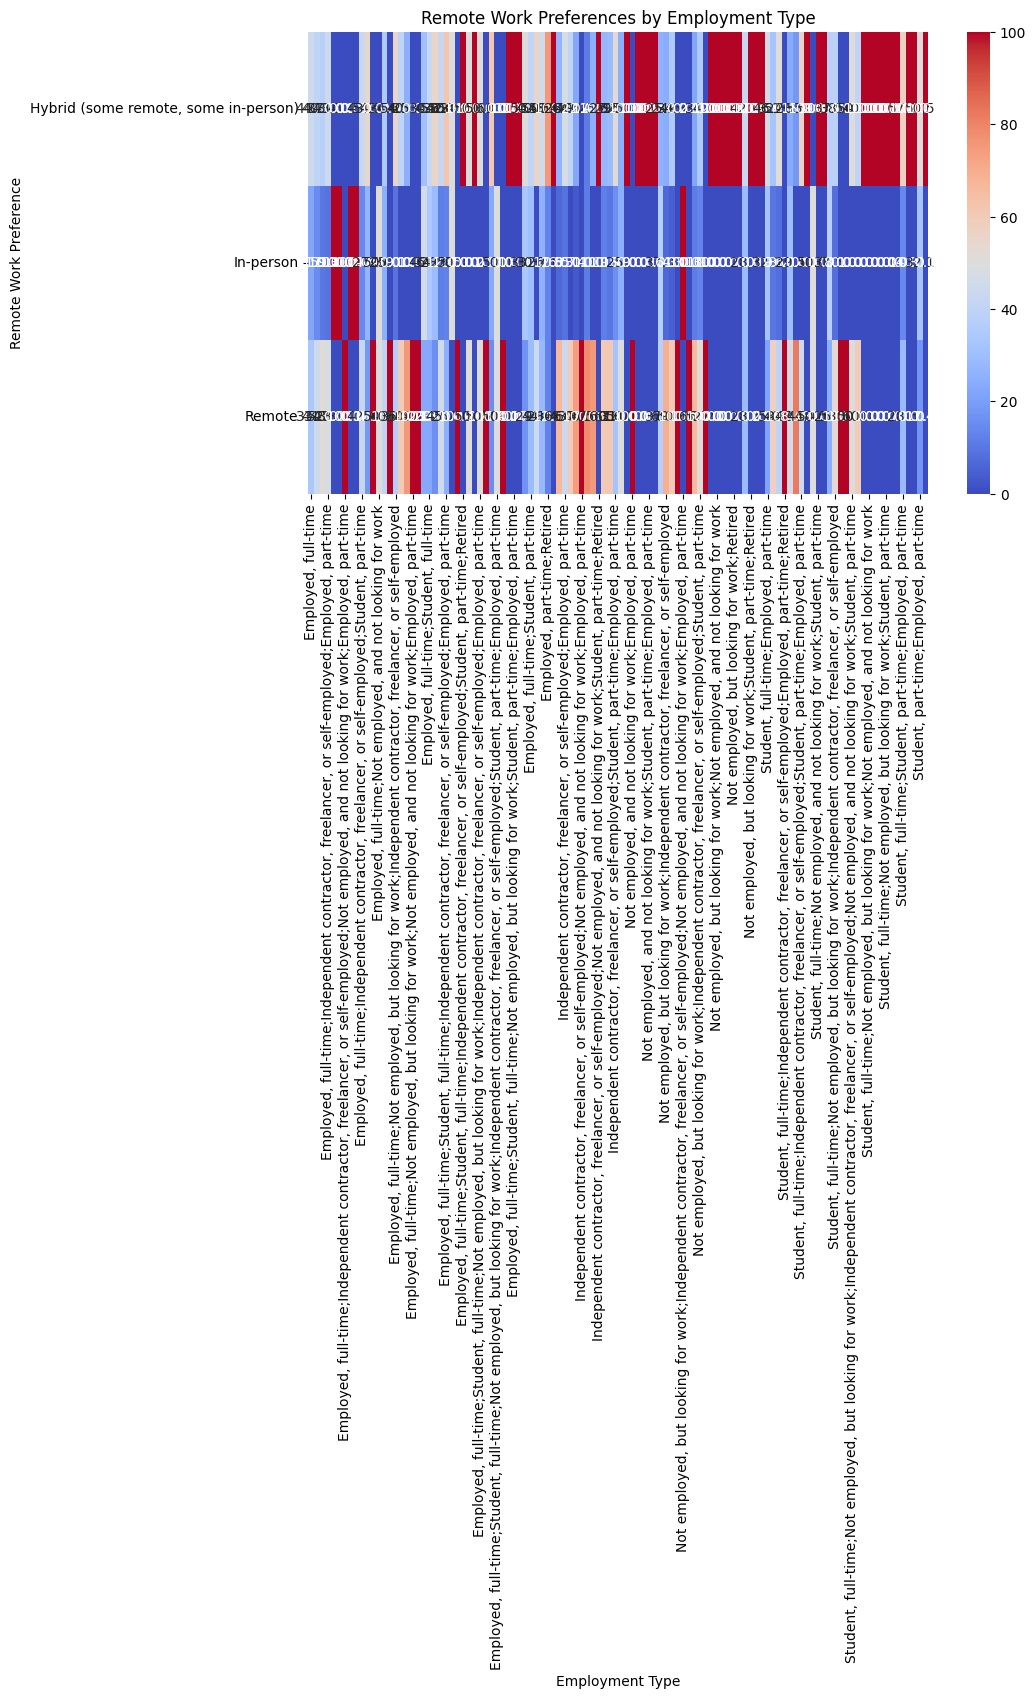

Remote Work Preferences by Job Role:
 DevType                               Academic researcher  Blockchain  \
RemoteWork                                                              
Hybrid (some remote, some in-person)            65.670436   28.510638   
In-person                                       25.040388   10.212766   
Remote                                           9.289176   61.276596   

DevType                               Cloud infrastructure engineer  \
RemoteWork                                                            
Hybrid (some remote, some in-person)                      47.318612   
In-person                                                  8.201893   
Remote                                                    44.479495   

DevType                               Data engineer  Data or business analyst  \
RemoteWork                                                                      
Hybrid (some remote, some in-person)      50.447227                 52.963671 

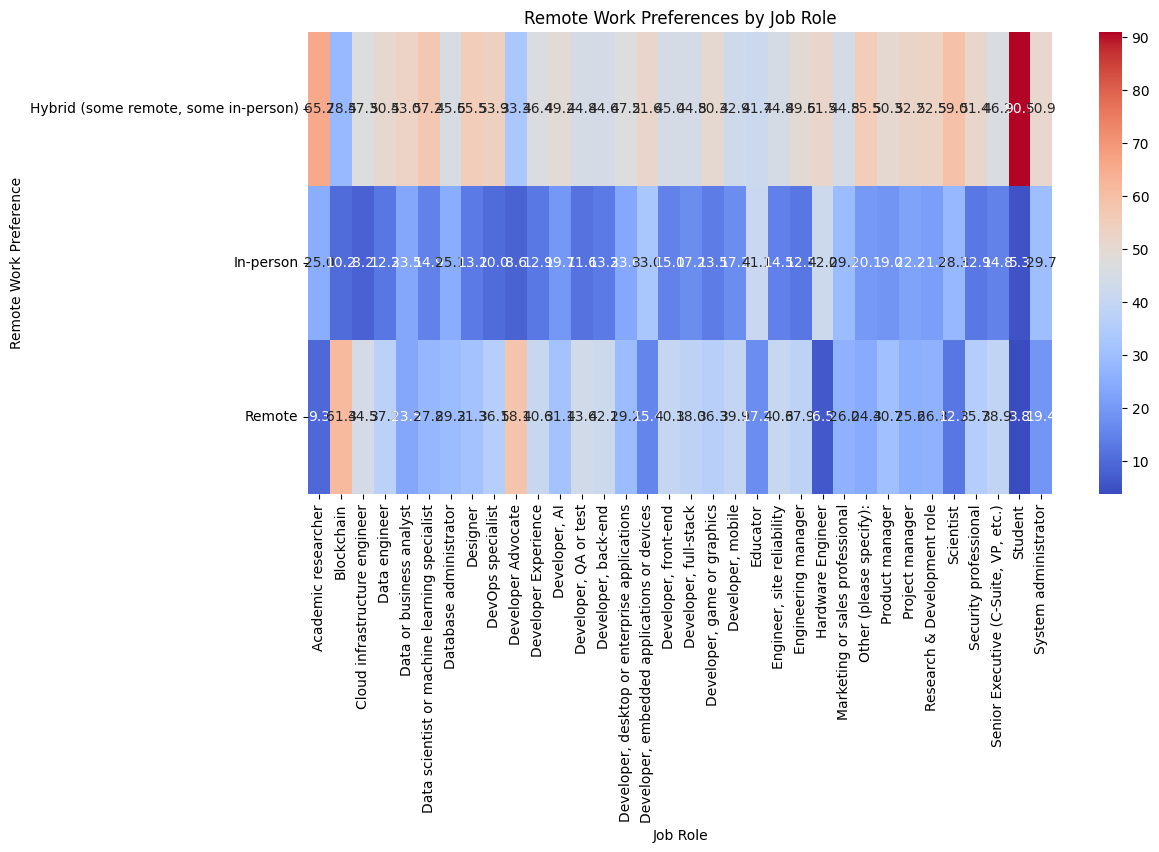

In [7]:
## Write your code here

plt.figure(figsize=(8, 5))
sns.countplot(x=df['RemoteWork'], palette='viridis')

plt.xlabel('Remote Work Preference')
plt.ylabel('Count')
plt.title('Distribution of Remote Work Preferences')

plt.xticks(rotation=45)
plt.show()

remote_vs_employment = pd.crosstab(df['RemoteWork'], df['Employment'], normalize='columns') * 100

print("Remote Work Preferences by Employment Type:\n", remote_vs_employment)

plt.figure(figsize=(10, 6))
sns.heatmap(remote_vs_employment, annot=True, cmap='coolwarm', fmt='.1f')

plt.xlabel('Employment Type')
plt.ylabel('Remote Work Preference')
plt.title('Remote Work Preferences by Employment Type')
plt.show()

df_exploded = df.assign(DevType=df['DevType'].str.split(';')).explode('DevType')

remote_vs_role = pd.crosstab(df_exploded['RemoteWork'], df_exploded['DevType'], normalize='columns') * 100

print("Remote Work Preferences by Job Role:\n", remote_vs_role)

plt.figure(figsize=(12, 6))
sns.heatmap(remote_vs_role, annot=True, cmap='coolwarm', fmt='.1f')

plt.xlabel('Job Role')
plt.ylabel('Remote Work Preference')
plt.title('Remote Work Preferences by Job Role')
plt.xticks(rotation=90)  # Rotate labels for readability
plt.show()


#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


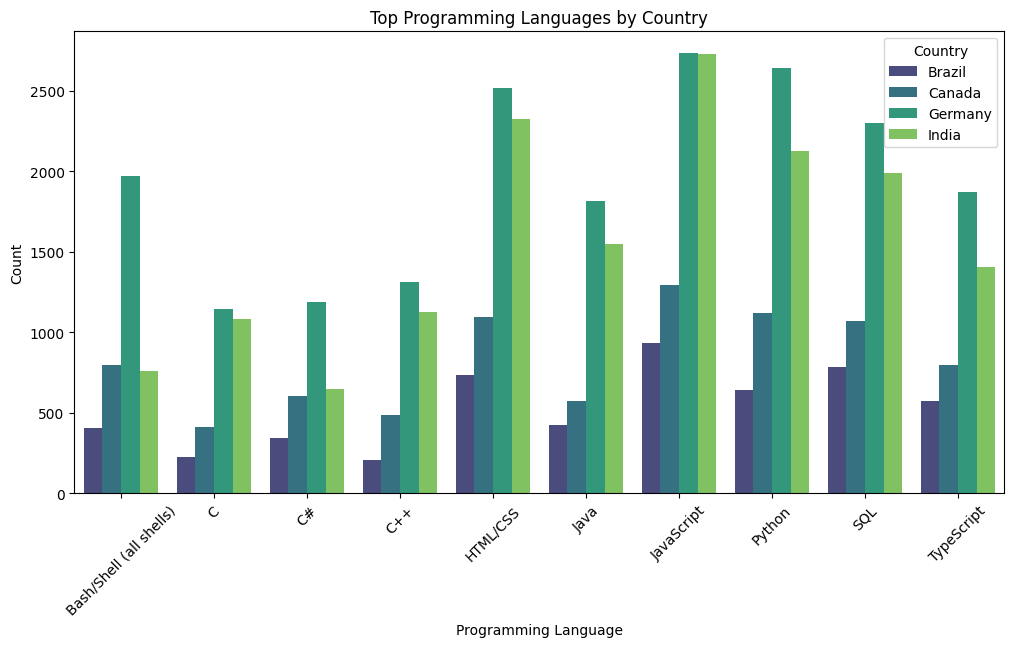

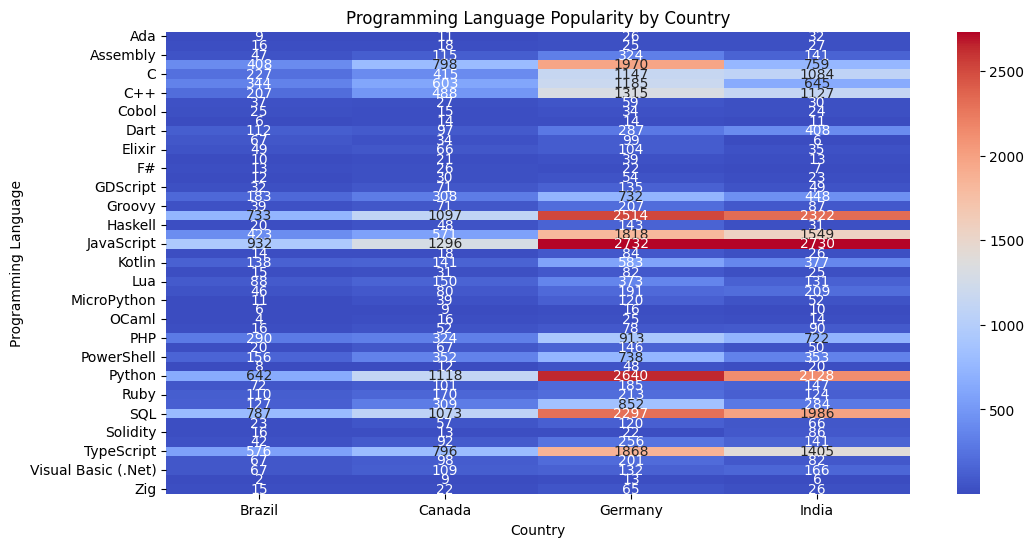

In [8]:
selected_countries = ['United States', 'India', 'Germany', 'Brazil', 'Canada']

df_filtered = df[df['Country'].isin(selected_countries)]

df_exploded = df_filtered.assign(LanguageHaveWorkedWith=df_filtered['LanguageHaveWorkedWith'].str.split(';')).explode('LanguageHaveWorkedWith')

lang_counts = df_exploded.groupby(['Country', 'LanguageHaveWorkedWith']).size().reset_index(name='Count')

top_languages = df_exploded['LanguageHaveWorkedWith'].value_counts().head(10).index

lang_counts_filtered = lang_counts[lang_counts['LanguageHaveWorkedWith'].isin(top_languages)]

plt.figure(figsize=(12, 6))
sns.barplot(data=lang_counts_filtered, x='LanguageHaveWorkedWith', y='Count', hue='Country', palette='viridis')

plt.xlabel('Programming Language')
plt.ylabel('Count')
plt.title('Top Programming Languages by Country')
plt.xticks(rotation=45)
plt.legend(title='Country')
plt.show()

# ---------------------------
# 5. Visualize: Heatmap of Language Popularity by Region
# ---------------------------
# Pivot data for heatmap
heatmap_data = lang_counts.pivot(index='LanguageHaveWorkedWith', columns='Country', values='Count').fillna(0)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='.0f')

plt.xlabel('Country')
plt.ylabel('Programming Language')
plt.title('Programming Language Popularity by Country')
plt.show()

#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


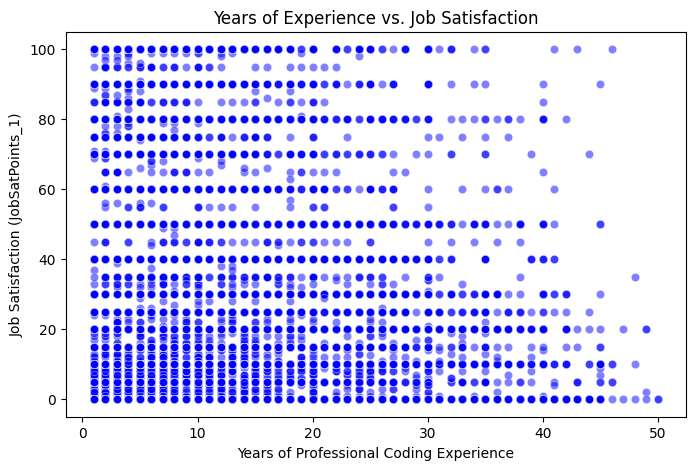

In [9]:
## Write your code here
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

df_filtered = df[['YearsCodePro', 'JobSatPoints_1']].dropna()

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_filtered, x='YearsCodePro', y='JobSatPoints_1', alpha=0.5, color='blue')

plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction (JobSatPoints_1)')
plt.title('Years of Experience vs. Job Satisfaction')

plt.show()

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


Education Level vs. Employment Type:
 Employment                                          Employed, full-time  \
EdLevel                                                                   
Associate degree (A.A., A.S., etc.)                            2.899384   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                  46.012320   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)               30.146475   
Primary/elementary school                                      0.438056   
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                 5.675565   
Secondary school (e.g. American high school, Ge...             3.997262   
Some college/university study without earning a...             9.798768   
Something else                                                 1.032170   

Employment                                          Employed, full-time;Employed, part-time  \
EdLevel                                                                                       
Associate degree (A.A

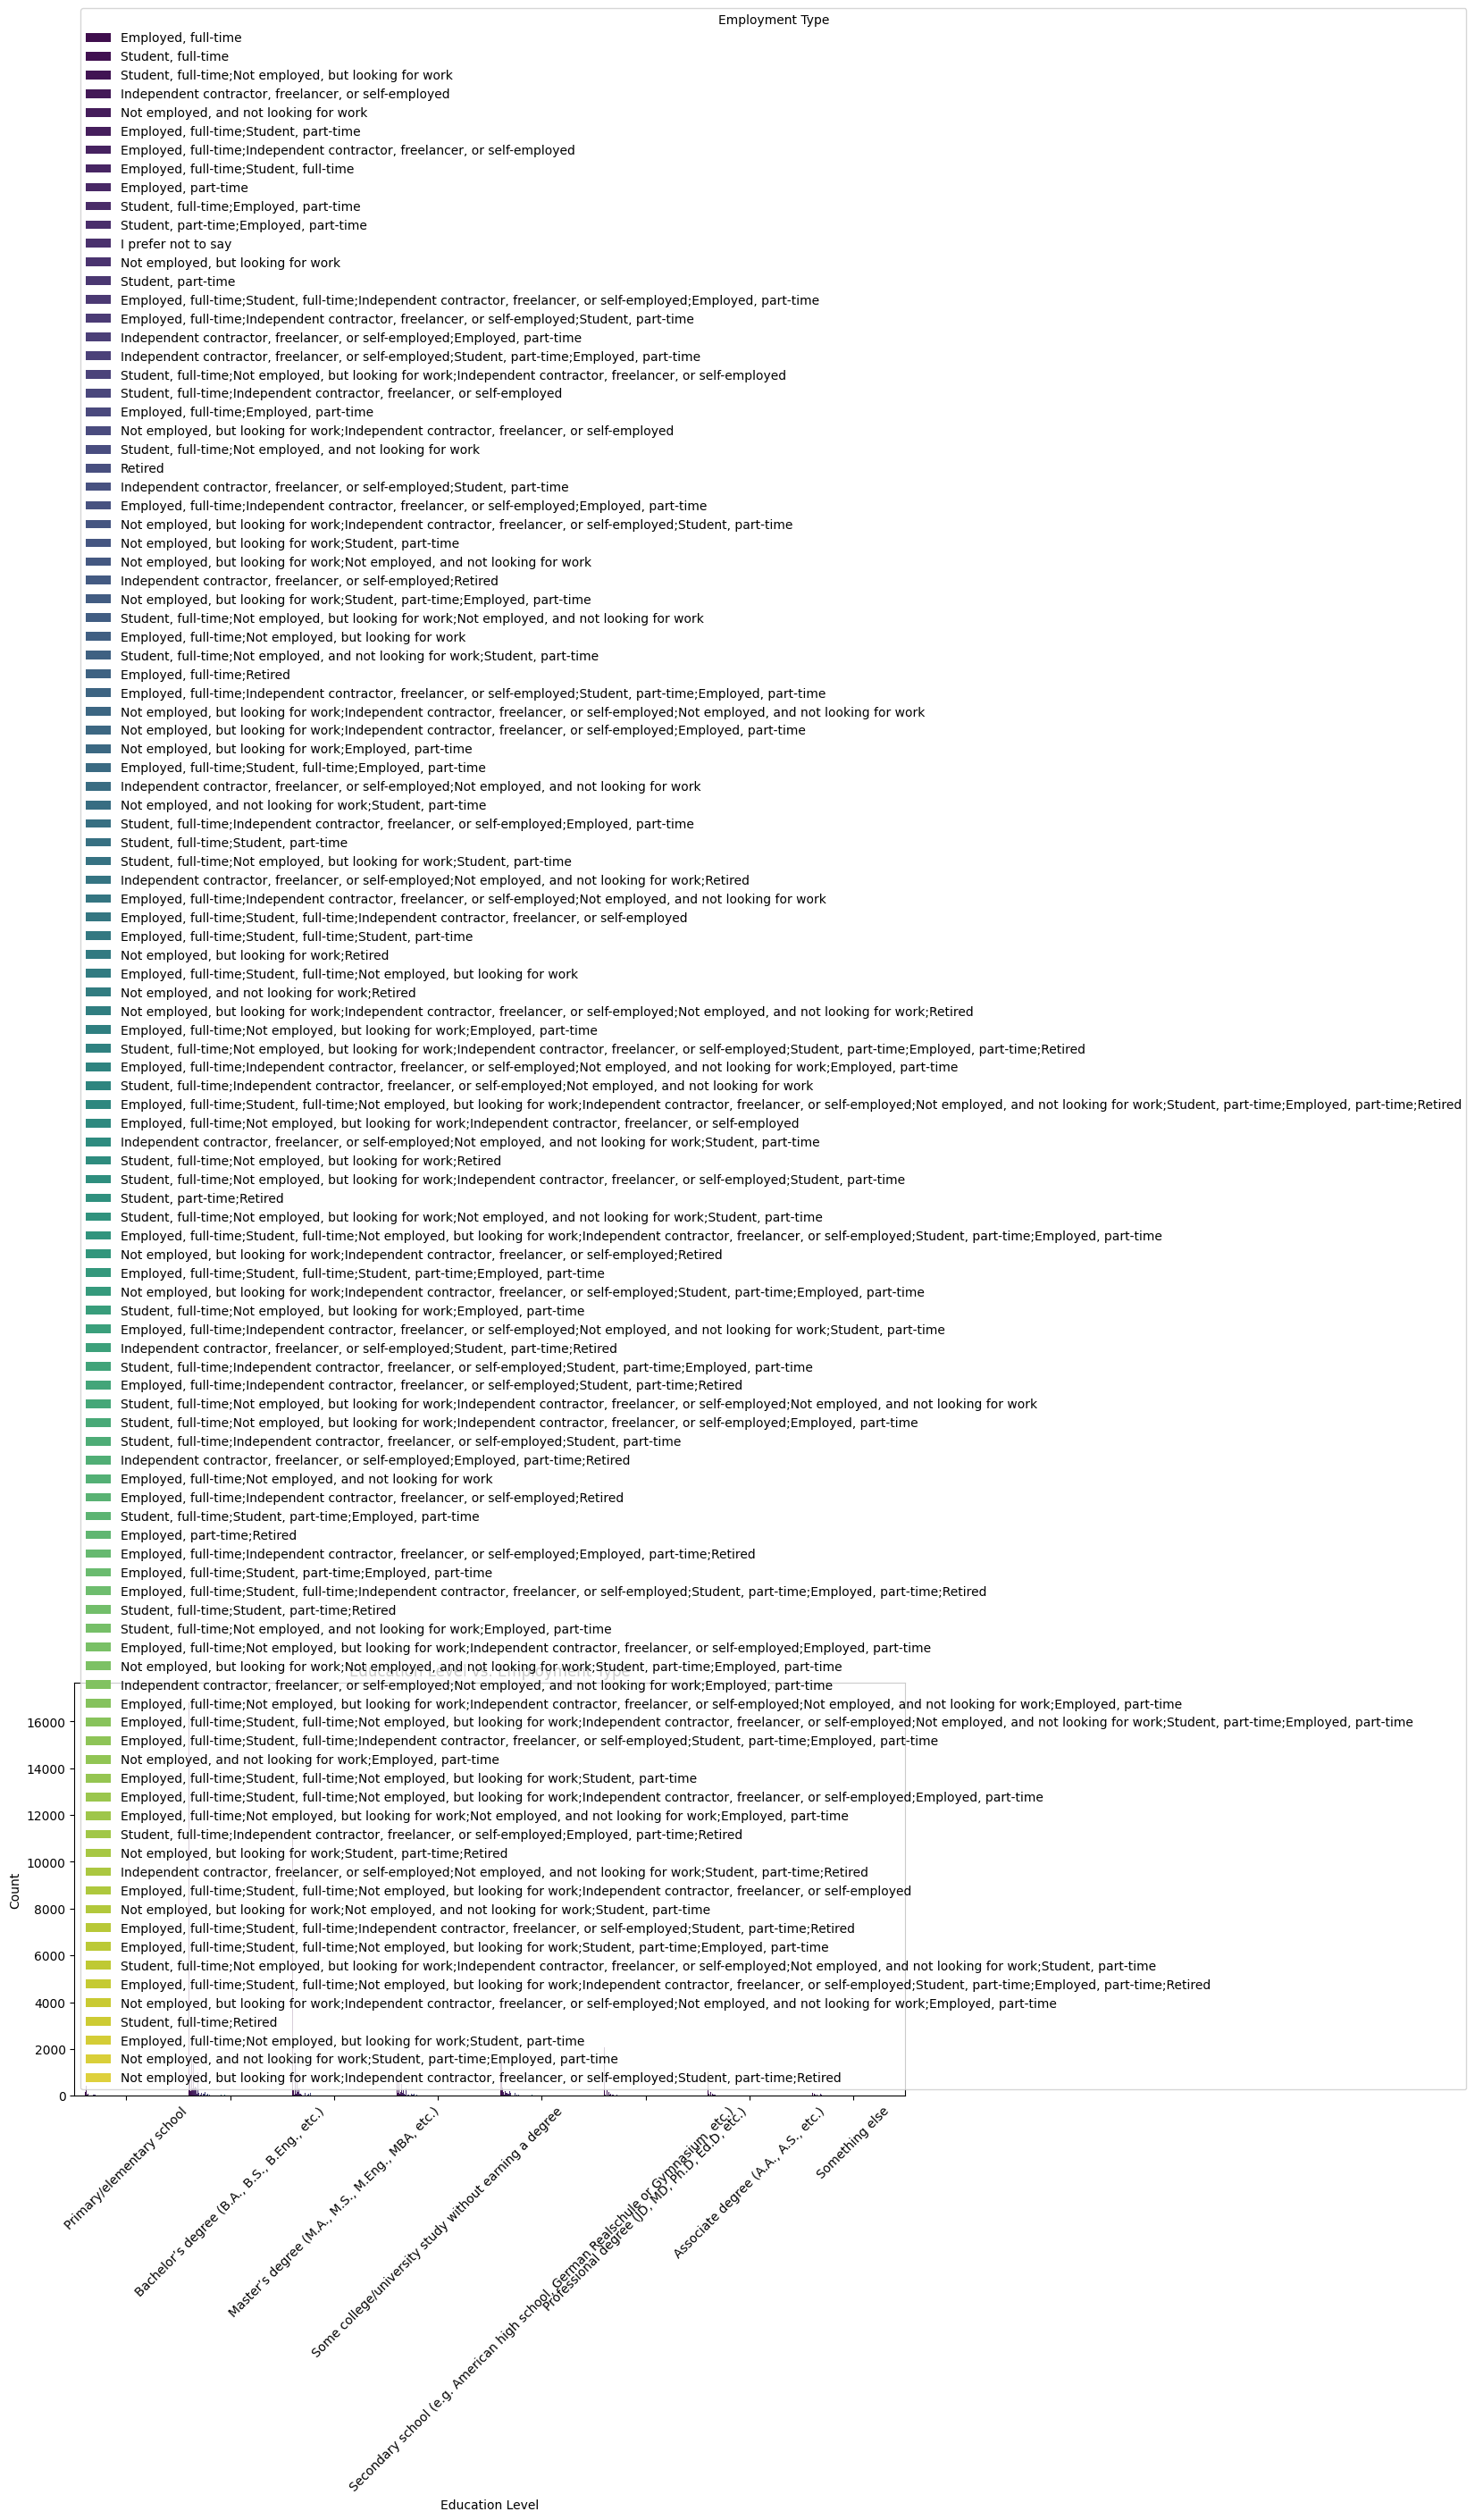

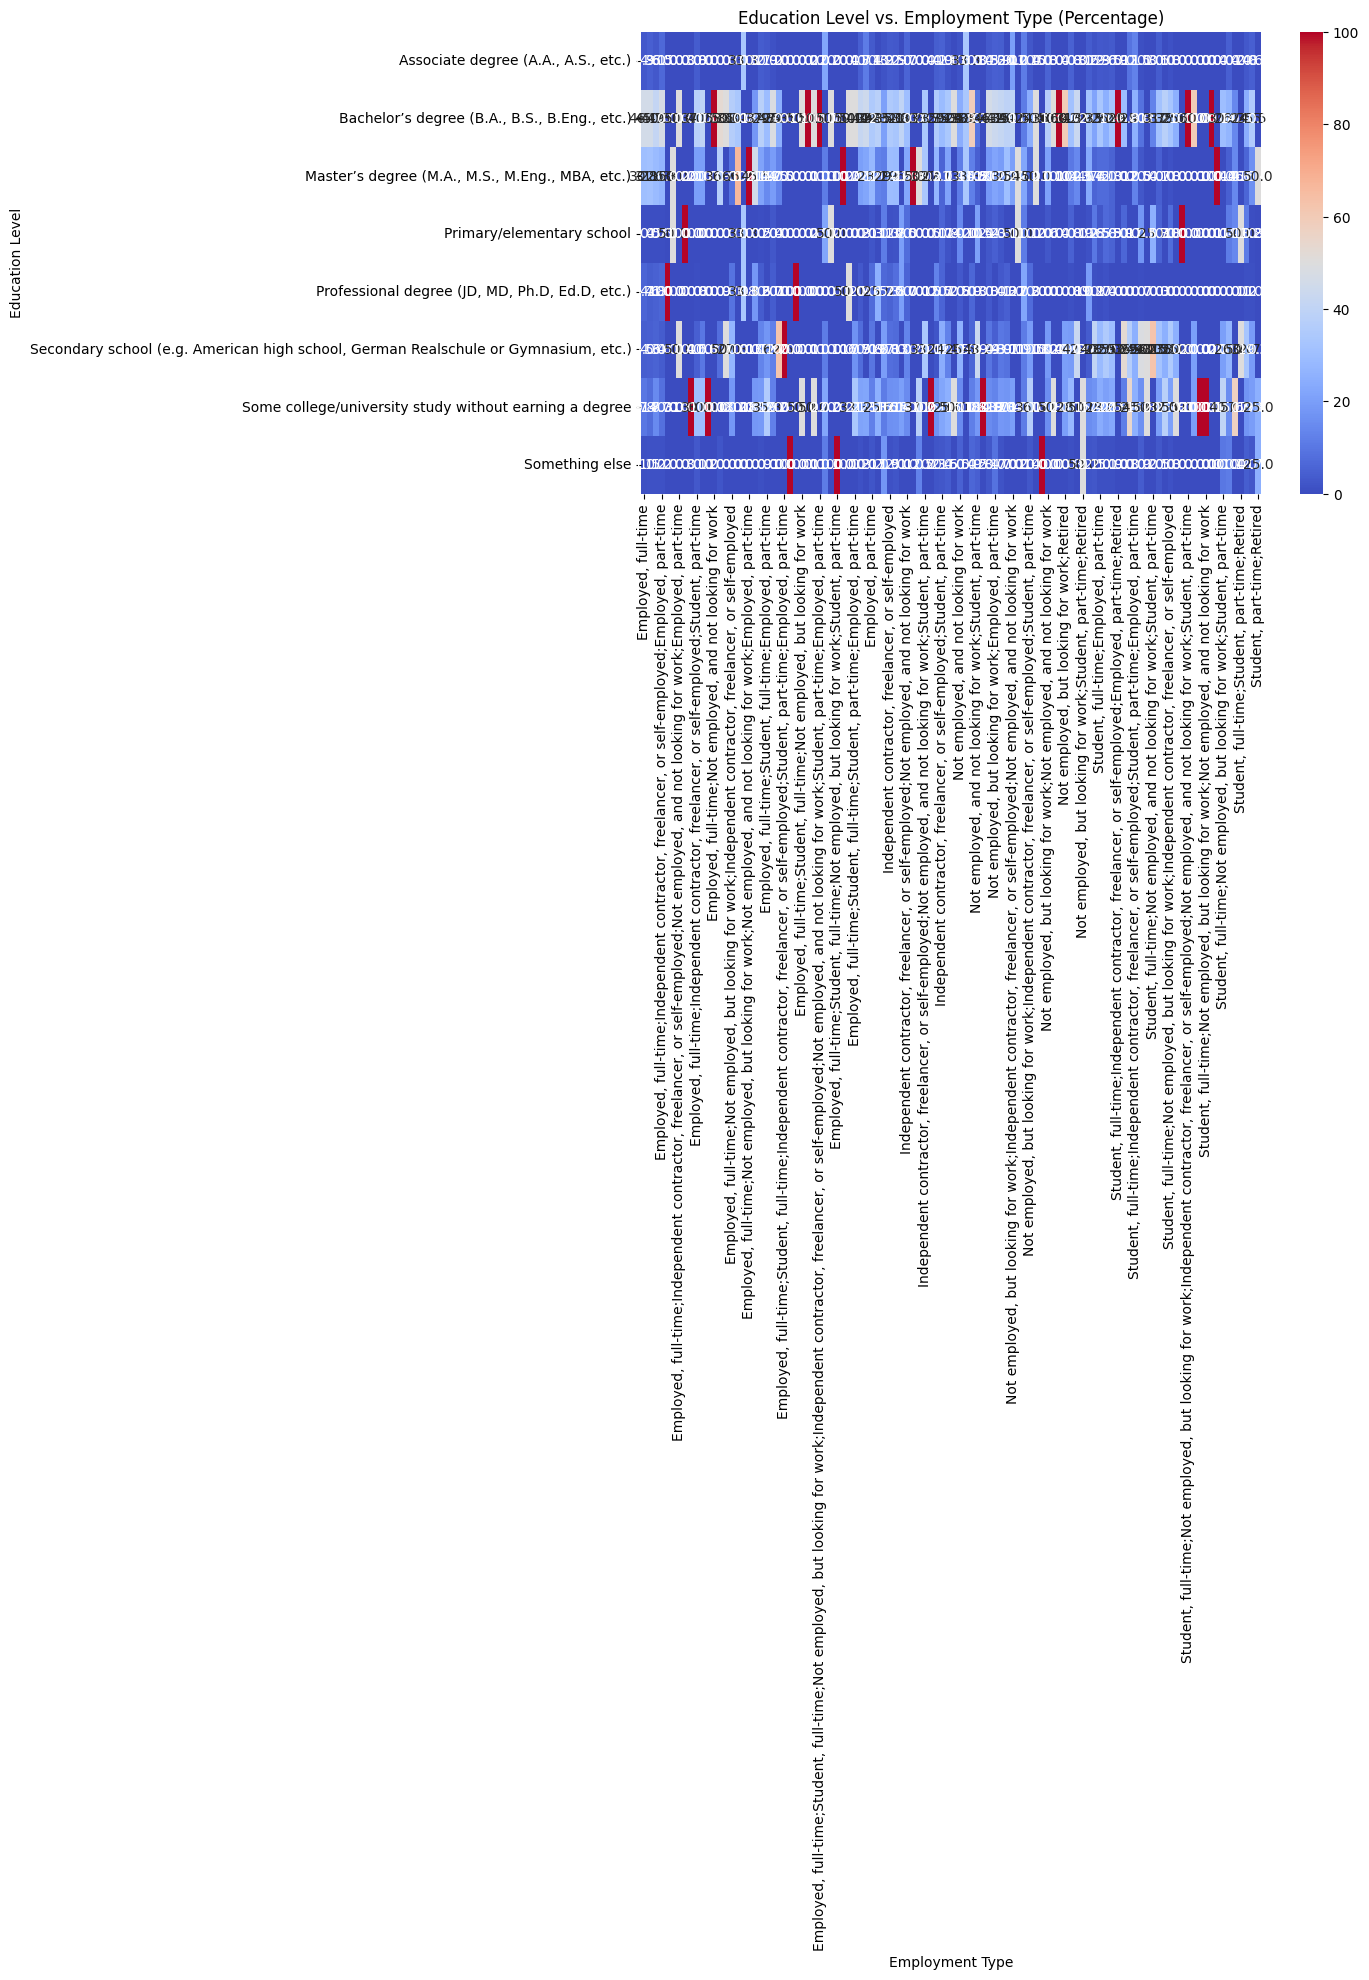

In [10]:
## Write your code here
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

edu_vs_employment = pd.crosstab(df['EdLevel'], df['Employment'], normalize='columns') * 100

print("Education Level vs. Employment Type:\n", edu_vs_employment)

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='EdLevel', hue='Employment', palette='viridis')

plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Education Level vs. Employment Type')
plt.xticks(rotation=45)  # Rotate labels for readability
plt.legend(title='Employment Type')
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(edu_vs_employment, annot=True, cmap='coolwarm', fmt=".1f")

plt.xlabel('Employment Type')
plt.ylabel('Education Level')
plt.title('Education Level vs. Employment Type (Percentage)')
plt.show()

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [ ]:
## Write your code here
output_file = "modified_survey_data.csv"

df.to_csv(output_file, index=False)

print(f"Dataset saved as {output_file}")

<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
